In [1]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v3/auth/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In [2]:
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_b9c96895_3ee1_4c36_9da5_81342009fb95',
  'project_id':'3bab2f88b07d441bacd9bb0e1a5e7cda',
  'region':'dallas',
  'user_id':'2d744441cf45457b93268d97912da96b',
  'domain_id':'6cfe71447c1349bbbf65fb2fe9f2ceb7',
  'domain_name':'1141853',
  'username':'admin_41692749ed5d1737ed313cb0ae413c678273b8e1',
  'password':"""Ncihv},NGLtm9BU6""",
  'filename':'wildlife.csv',
  'container':'notebooks',
  'tenantId':'s17d-64313c0aeaf5ab-f9f64455640b'
}

In [3]:
credentials_1['name'] = 'keystone'
set_hadoop_config(credentials_1)


In [4]:
from __future__ import division
import numpy as np

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# adding the PySpark CSV reader 
sc.addPyFile("https://raw.githubusercontent.com/seahboonsiew/pyspark-csv/master/pyspark_csv.py")
import pyspark_csv as pycsv

In [5]:
hits_rdd = sc.textFile("swift://" + credentials_1['container'] + "." + credentials_1['name'] + "/wildlife.csv")

def skip_header(idx, iterator):
    if (idx == 0):
        next(iterator)
    return iterator

hits_header = hits_rdd.first()
hits_header_list = hits_header.split(",")
hits_body_rdd = hits_rdd.mapPartitionsWithIndex(skip_header)

hits_df = pycsv.csvToDataFrame(sqlContext, hits_body_rdd, sep=",", columns=hits_header_list)
hits_df.cache()





DataFrame[INCIDENT_DATE: timestamp, STATE: string, AIRPORT_ID: string, AIRPORT: string, OPID: string, OPERATOR: string, ATYPE: string, TYPE_ENG: string, SPECIES_ID: string, SPECIES: string, DAMAGE: string, COST_REPAIRS: int, AMA: string, AMO: int, EMA: null, EMO: string, AC_CLASS: string, AC_MASS: int, NUM_ENGS: int, ENG_1_POS: string, ENG_2_POS: int, ENG_3_POS: string, ENG_4_POS: int, REG: string, FLT: string, REMAINS_COLLECTED: string, REMAINS_SENT: string, INCIDENT_MONTH: int, INCIDENT_YEAR: int, TIME_OF_DAY: string, TIME: int, FAAREGION: string, ENROUTE: string, RUNWAY: string, LOCATION: string, HEIGHT: int, SPEED: int, DISTANCE: double, PHASE_OF_FLT: string, STR_RAD: string, DAM_RAD: string, STR_WINDSHLD: string, DAM_WINDSHLD: string, STR_NOSE: string, DAM_NOSE: string, STR_ENG1: string, DAM_ENG1: string, STR_ENG2: string, DAM_ENG2: string, STR_ENG3: string, DAM_ENG3: string, STR_ENG4: string, DAM_ENG4: string, INGESTED: string, STR_PROP: string, DAM_PROP: string, STR_WING_ROT: st

In [6]:
hits_df.printSchema()

root
 |-- INCIDENT_DATE: timestamp (nullable = true)
 |-- STATE: string (nullable = true)
 |-- AIRPORT_ID: string (nullable = true)
 |-- AIRPORT: string (nullable = true)
 |-- OPID: string (nullable = true)
 |-- OPERATOR: string (nullable = true)
 |-- ATYPE: string (nullable = true)
 |-- TYPE_ENG: string (nullable = true)
 |-- SPECIES_ID: string (nullable = true)
 |-- SPECIES: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- COST_REPAIRS: integer (nullable = true)
 |-- AMA: string (nullable = true)
 |-- AMO: integer (nullable = true)
 |-- EMA: null (nullable = true)
 |-- EMO: string (nullable = true)
 |-- AC_CLASS: string (nullable = true)
 |-- AC_MASS: integer (nullable = true)
 |-- NUM_ENGS: integer (nullable = true)
 |-- ENG_1_POS: string (nullable = true)
 |-- ENG_2_POS: integer (nullable = true)
 |-- ENG_3_POS: string (nullable = true)
 |-- ENG_4_POS: integer (nullable = true)
 |-- REG: string (nullable = true)
 |-- FLT: string (nullable = true)
 |-- REMAINS_COL

In [7]:
%matplotlib inline
!pip install --user seaborn
#importing plotting libraries 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import requests, json, StringIO

In [8]:
hits_df

DataFrame[INCIDENT_DATE: timestamp, STATE: string, AIRPORT_ID: string, AIRPORT: string, OPID: string, OPERATOR: string, ATYPE: string, TYPE_ENG: string, SPECIES_ID: string, SPECIES: string, DAMAGE: string, COST_REPAIRS: int, AMA: string, AMO: int, EMA: null, EMO: string, AC_CLASS: string, AC_MASS: int, NUM_ENGS: int, ENG_1_POS: string, ENG_2_POS: int, ENG_3_POS: string, ENG_4_POS: int, REG: string, FLT: string, REMAINS_COLLECTED: string, REMAINS_SENT: string, INCIDENT_MONTH: int, INCIDENT_YEAR: int, TIME_OF_DAY: string, TIME: int, FAAREGION: string, ENROUTE: string, RUNWAY: string, LOCATION: string, HEIGHT: int, SPEED: int, DISTANCE: double, PHASE_OF_FLT: string, STR_RAD: string, DAM_RAD: string, STR_WINDSHLD: string, DAM_WINDSHLD: string, STR_NOSE: string, DAM_NOSE: string, STR_ENG1: string, DAM_ENG1: string, STR_ENG2: string, DAM_ENG2: string, STR_ENG3: string, DAM_ENG3: string, STR_ENG4: string, DAM_ENG4: string, INGESTED: string, STR_PROP: string, DAM_PROP: string, STR_WING_ROT: st

In [9]:
def get_file_content(credentials_1):
    """For given credentials, this functions returns a StringIO object containing the file content."""

    url1 = ''.join([credentials_1['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials_1['username'],'domain': {'id': credentials_1['domain_id']},
            'password': credentials_1['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials_1['region']):
                    url2 = ''.join([e2['url'],'/', credentials_1['container'], '/', credentials_1['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [10]:
content_string = get_file_content(credentials_1)
hits_df_head = pd.read_csv(content_string)

/usr/local/src/bluemix_jupyter_bundle.v22/notebook/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15,19,21,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
hits_df_head.head()

,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPID,OPERATOR,ATYPE,TYPE_ENG,SPECIES_ID,SPECIES,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,3/30/2016 0:00,CA,KMHR,SACRAMENTO MATHER ARPT,HGT,GMJ AIR SHUTTLE,EMB-145,D,ZX3,Sparrows,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Air Transport Operations,NaN,NaN,9/1/2016 0:00,False,False
1,12/21/2015 0:00,CA,KAPC,NAPA COUNTY ARPT,BUS,BUSINESS,CITATION X,D,N6024,Least sandpiper,...,Deleted,Deleted,NaN,Multiple,Tower,NaN,NaN,7/8/2016 0:00,False,False
2,7/16/2015 0:00,CA,KVNY,VAN NUYS ARPT,BUS,BUSINESS,CITATION X,D,K5114,American kestrel,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,NaN,False,False
3,7/12/2015 0:00,CA,KSMF,SACRAMENTO INTL,CPZ,COMPASS AIRLINES,EMB-145,D,YI009,Cliff swallow,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,NaN,False,False
4,7/10/2015 0:00,CA,KMHR,SACRAMENTO MATHER ARPT,HGT,GMJ AIR SHUTTLE,EMB-145,D,UNKBM,Unknown bird - medium,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,NaN,False,False


In [12]:
hits_df_head.tail()

,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPID,OPERATOR,ATYPE,TYPE_ENG,SPECIES_ID,SPECIES,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
13578,5/28/1990 0:00,CA,KRHV,REID-HILLVIEW ARPT OF SANTA CLARA CNTY,UNK,UNKNOWN,C-177,A,UNKBM,Unknown bird - medium,...,Deleted,Deleted,NaN,FAA Form 5200-7,NaN,NaN,NaN,3/8/1999 0:00,False,False
13579,5/23/1990 0:00,CA,KSFO,SAN FRANCISCO INTL ARPT,DAL,DELTA AIR LINES,B-767,D,UNKBM,Unknown bird - medium,...,Deleted,Deleted,5/23/1990 0:00,FAA Form 5200-7,Other,NaN,NaN,3/8/1999 0:00,False,False
13580,5/2/1990 0:00,CA,KBUR,BOB HOPE ARPT,1AWE,AMERICA WEST AIRLINES,B-737,D,NE1,Gulls,...,Deleted,Deleted,5/9/1990 0:00,FAA Form 5200-7,NaN,NaN,NaN,3/9/1999 0:00,False,False
13581,2/14/1990 0:00,CA,KSMF,SACRAMENTO INTL,UAL,UNITED AIRLINES,B-737,D,UNKBM,Unknown bird - medium,...,Deleted,Deleted,NaN,Engine Manufacturer,Other,NaN,NaN,9/27/2004 0:00,False,True
13582,1/18/1990 0:00,CA,KSBD,SAN BERNARDINO INTL ARPT,MIL,MILITARY,C-141B,NaN,UNKBM,Unknown bird - medium,...,Deleted,Deleted,5/19/2000 0:00,BASH,NaN,NaN,NaN,10/21/2009 0:00,False,False


In [13]:
hits_header_list

[u'INCIDENT_DATE',
 u'STATE',
 u'AIRPORT_ID',
 u'AIRPORT',
 u'OPID',
 u'OPERATOR',
 u'ATYPE',
 u'TYPE_ENG',
 u'SPECIES_ID',
 u'SPECIES',
 u'DAMAGE',
 u'COST_REPAIRS',
 u'AMA',
 u'AMO',
 u'EMA',
 u'EMO',
 u'AC_CLASS',
 u'AC_MASS',
 u'NUM_ENGS',
 u'ENG_1_POS',
 u'ENG_2_POS',
 u'ENG_3_POS',
 u'ENG_4_POS',
 u'REG',
 u'FLT',
 u'REMAINS_COLLECTED',
 u'REMAINS_SENT',
 u'INCIDENT_MONTH',
 u'INCIDENT_YEAR',
 u'TIME_OF_DAY',
 u'TIME',
 u'FAAREGION',
 u'ENROUTE',
 u'RUNWAY',
 u'LOCATION',
 u'HEIGHT',
 u'SPEED',
 u'DISTANCE',
 u'PHASE_OF_FLT',
 u'STR_RAD',
 u'DAM_RAD',
 u'STR_WINDSHLD',
 u'DAM_WINDSHLD',
 u'STR_NOSE',
 u'DAM_NOSE',
 u'STR_ENG1',
 u'DAM_ENG1',
 u'STR_ENG2',
 u'DAM_ENG2',
 u'STR_ENG3',
 u'DAM_ENG3',
 u'STR_ENG4',
 u'DAM_ENG4',
 u'INGESTED',
 u'STR_PROP',
 u'DAM_PROP',
 u'STR_WING_ROT',
 u'DAM_WING_ROT',
 u'STR_FUSE',
 u'DAM_FUSE',
 u'STR_LG',
 u'DAM_LG',
 u'STR_TAIL',
 u'DAM_TAIL',
 u'STR_LGHTS',
 u'DAM_LGHTS',
 u'STR_OTHER',
 u'DAM_OTHER',
 u'OTHER_SPECIFY',
 u'EFFECT',
 u'EFFECT_O

In [14]:
"""""collisions_out_row = pyspark.sql.Row(*(["INCEDENT_DATE", "AIRPORT", "OPERATOR","LOCATION", "RUNWAY", "SPECIES"] + [c for c in hits_header_list
                      if c not in ["RUNWAY", "SPECIES", "ATYPE", "OPERATOR", "LOCATION" ,"INCIDENT_DATE"]]))



collisions_out_index = list(collisions_out_row)



collisions_out = hits_df.map(
    lambda row: collisions_out_row(*(get_temporal(row) + get_spatial(row) + get_rest(row))))



def get_spatial(row):
    """
    Computes the location identifier from the input row

    Returns:
        List of spatial key columns
    """
    loc = row.asDict()['LOCATION'].lower()
    borough = row.asDict()['RUNWAY'].lower()
    return [loc, borough]


def get_temporal(row):
    """
    Computes the temporal key from a given row
    """
    from datetime import datetime
    return [datetime(row.DATE.year, row.DATE.month, row.DATE.day)]


def get_rest(row):
    """
    Computes the rest from a given row
    """
    return [row.asDict()[column] for column in hits_header_list
             if column not in ["RUNWAY", "SPECIES", "ATYPE", "OPERATOR", "LOCATION","INCIDENT_DATE"]]

delchars = ''.join(c for c in map(chr, range(256)) if not c.isalnum())

deltable = dict((ord(char), None) for char in delchars) # Python2 unicode
""""


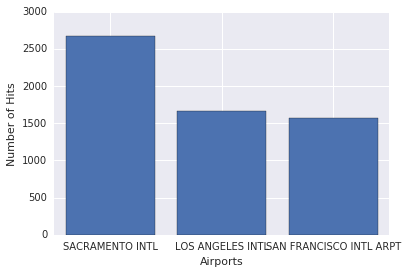

In [95]:
import matplotlib as StatePlt

%matplotlib inline
stCounts = hits_df_head['AIRPORT'].value_counts()
stCounts= stCounts.head(3)

StateList = []
for val in stCounts.keys():
    StateList.append(stCounts[val])
#x-axis label
StatePlt.pyplot.xlabel("Airports")
#y-axis label
StatePlt.pyplot.ylabel("Number of Hits")
#Draw the graph
StatePlt.pyplot.bar(range(len(stCounts)),StateList,align='center')
StatePlt.pyplot.xticks(range(len(stCounts)),stCounts.keys())
StatePlt.pyplot.show()

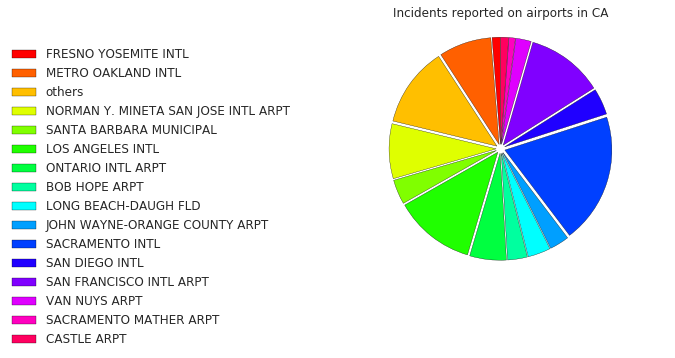

In [30]:
%matplotlib inline
import colorsys
import matplotlib as plt

df = hits_df_head['AIRPORT'].value_counts()
others=0
list ={}
for val in df.keys():
    if df[val] < 100:
        others = others + df[val]
    else:
        list[val] = df[val] 
list['others'] = others

labels = list.keys()
i = 0
values = []
while i < len(list):
    values.append(list.get(labels[i]))
    i= i+1

explode = []
for k in labels:
    explode.append(0.05)

HSV_tuples = [(x*1.0/i, 1, 1) for x in range(i)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

patches, texts = plt.pyplot.pie(values,colors= RGB_tuples, explode=explode, startangle=90, radius=1.2)
plt.pyplot.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.pyplot.axis('equal')
plt.pyplot.title('Incidents reported on airports in CA\n')
plt.pyplot.show()

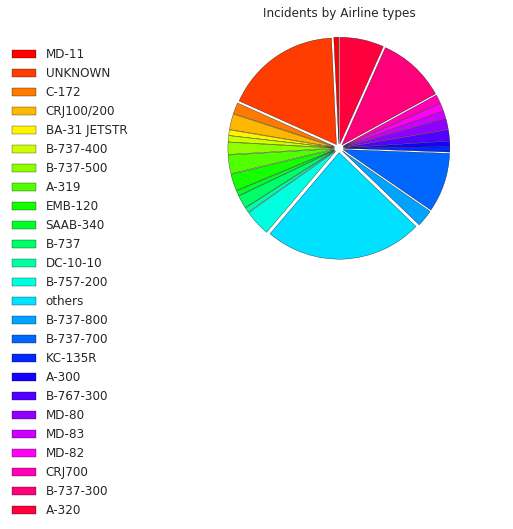

In [32]:
%matplotlib inline
import colorsys

df = hits_df_head['ATYPE'].value_counts()
others=0
list ={}
for val in df.keys():
    if df[val] < 100:
        others = others + df[val]
    else:
        list[val] = df[val] 
list['others'] = others

labels = list.keys()
i = 0
values = []
while i < len(list):
    values.append(list.get(labels[i]))
    i= i+1

explode = []
for k in labels:
    explode.append(0.05)

HSV_tuples = [(x*1.0/i, 1, 1) for x in range(i)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

patches, texts = plt.pyplot.pie(values,colors= RGB_tuples, explode=explode, startangle=90, radius=1.2)
plt.pyplot.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.pyplot.axis('equal')
plt.pyplot.title('Incidents by Airline types\n')
plt.pyplot.show()

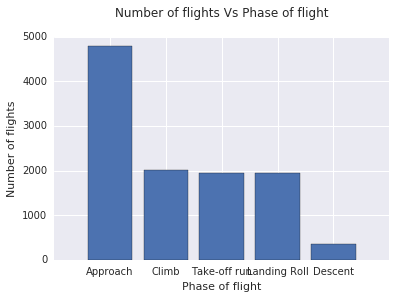

In [33]:
d = hits_df_head['PHASE_OF_FLT'].value_counts()
d= d.head(5)
valList = []
for val in d.keys():
        valList.append(d[val])
plt.pyplot.bar(range(len(d)), valList, align='center')
plt.pyplot.xticks(range(len(d)), d.keys())
plt.pyplot.grid(True)
plt.pyplot.xlabel('Phase of flight')
plt.pyplot.ylabel('Number of flights')
plt.pyplot.title('Number of flights Vs Phase of flight\n')
plt.pyplot.show()

In [34]:
hitsParse = hits_rdd.map(lambda line : line.split(","))

In [84]:
#print column 4
def getColumn(x):
    return x[3]

hitsAirports = hitsParse.map(getColumn)

In [85]:
hitsAirports =  hitsParse.map(getColumn)

In [86]:
hitsAirports.collect()

[u'AIRPORT',
 u'SACRAMENTO MATHER ARPT',
 u'NAPA COUNTY ARPT',
 u'VAN NUYS ARPT',
 u'SACRAMENTO INTL',
 u'SACRAMENTO MATHER ARPT',
 u'SACRAMENTO MATHER ARPT',
 u'SACRAMENTO MATHER ARPT',
 u'SAN FRANCISCO INTL ARPT',
 u'SACRAMENTO MATHER ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'CHARLES M. SCHULZ-SONOMA COUNTY ARPT',
 u'SACRAMENTO MATHER ARPT',
 u'METRO OAKLAND INTL',
 u'MC CLELLAN AIRFIELD',
 u'NAPA COUNTY ARPT',
 u'SACRAMENTO MATHER ARPT',
 u'BOB HOPE ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'SACRAMENTO MATHER ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'LONG BEACH-DAUGH FLD',
 u'NAPA COUNTY ARPT',
 u'SACRAMENTO MATHER ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'NORMAN Y. MINETA SAN JOSE INTL ARPT',
 u'VAN NUYS ARPT',
 u'OXNARD ARPT',
 u'SANTA BARBARA M

In [87]:
from pyspark.sql import SQLContext, Row
from datetime import datetime
sqlContext = SQLContext(sc)

hitsRows= hitsAirports.map(lambda p: Row(airport = p[3]))

hitsSchema = sqlContext.createDataFrame(hitsRows)
hitsSchema.registerTempTable("hitsAirports")
sqlContext.cacheTable("hitsAirports")

In [88]:
hit_by_airports = sqlContext.sql("SELECT COUNT(*) AS number_of_airport_hits FROM hitsAirports GROUP BY airport").collect()

In [89]:
print hit_by_airports


[Row(number_of_airport_hits=4665), Row(number_of_airport_hits=980), Row(number_of_airport_hits=264), Row(number_of_airport_hits=114), Row(number_of_airport_hits=69), Row(number_of_airport_hits=22), Row(number_of_airport_hits=467), Row(number_of_airport_hits=50), Row(number_of_airport_hits=10), Row(number_of_airport_hits=35), Row(number_of_airport_hits=38), Row(number_of_airport_hits=1237), Row(number_of_airport_hits=466), Row(number_of_airport_hits=98), Row(number_of_airport_hits=32), Row(number_of_airport_hits=4), Row(number_of_airport_hits=3970), Row(number_of_airport_hits=184), Row(number_of_airport_hits=821), Row(number_of_airport_hits=6), Row(number_of_airport_hits=8), Row(number_of_airport_hits=43), Row(number_of_airport_hits=1)]
